# Model wine quality based on physicochemical tests.

Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests


## Library Imports


In [73]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV

## Exploratory Analysis

In [7]:
# Read the Red wine data

data_red = pd.read_csv('winequality-red.csv', delimiter = ';')
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Shape of the data
data_red.shape

(1599, 12)

In [9]:
# Data type of different features
data_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

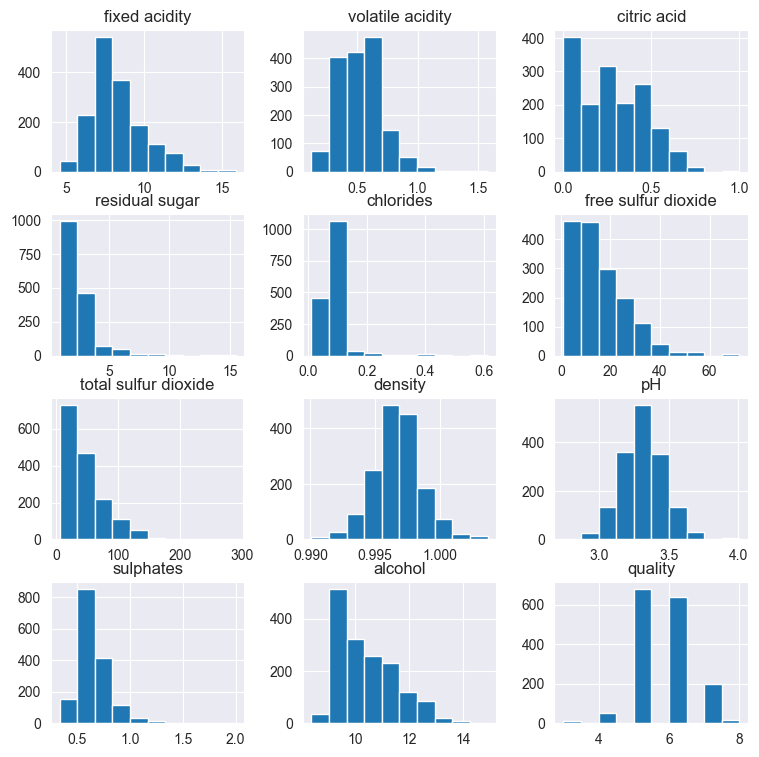

In [13]:
data_red.hist(figsize=(9,9))
plt.show()

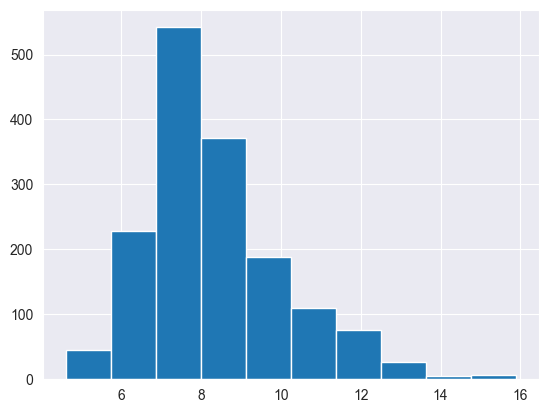

In [17]:
data_red['fixed acidity'].hist()
plt.show()

In [18]:
# Display summary statistics
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
# Display correlations between different features
correlations = data_red.corr()
correlations

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


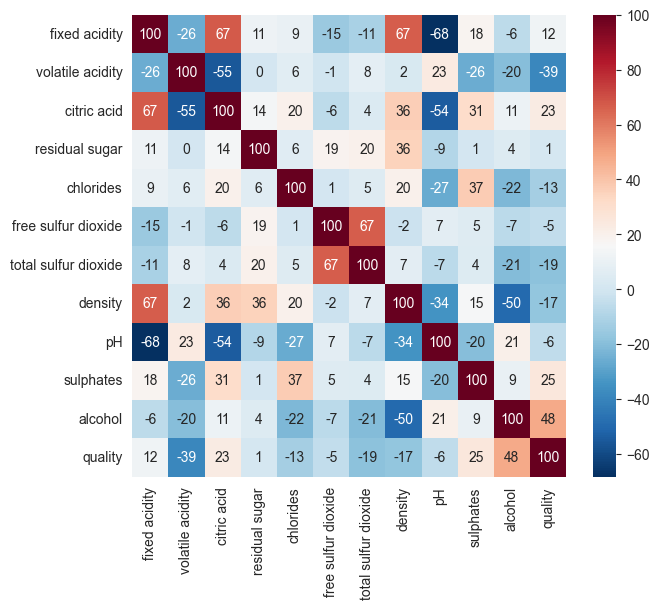

In [22]:
plt.figure(figsize=(7, 6))
sns.heatmap(correlations*100, cmap='RdBu_r', annot=True, fmt='.0f')
plt.show()

In [23]:
# Hide the top triangle in heatmap
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

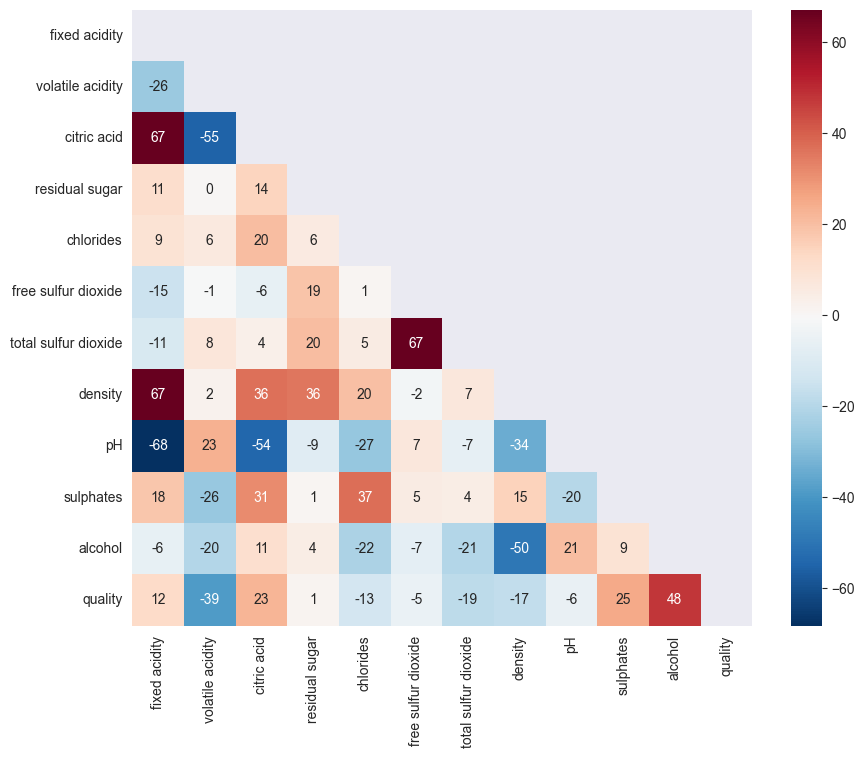

In [25]:
# Heatmap after removing mirror image
plt.figure(figsize=(10, 8))

sns.heatmap(correlations*100, cmap='RdBu_r',
           annot=True,
           fmt='.0f',
           mask=mask)
plt.show()

## Data Cleaning

In [26]:
# drop duplicates
data_red.drop_duplicates()
data_red.shape

(1599, 12)

In [27]:
# Check if any missing values (NA) in the dataframe
missing_values = data_red.isna().any()
print(missing_values)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


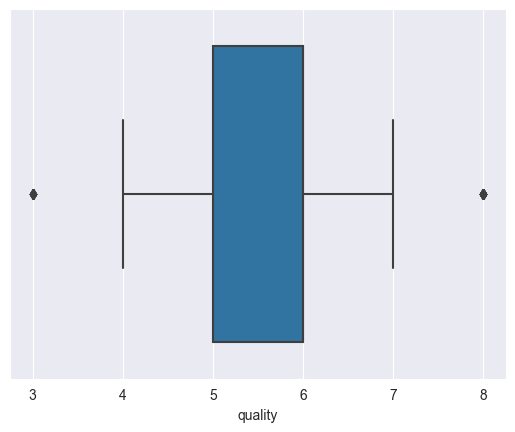

In [29]:
# Box plot of wine quality
sns.boxplot(x = 'quality', data=data_red)
plt.show()

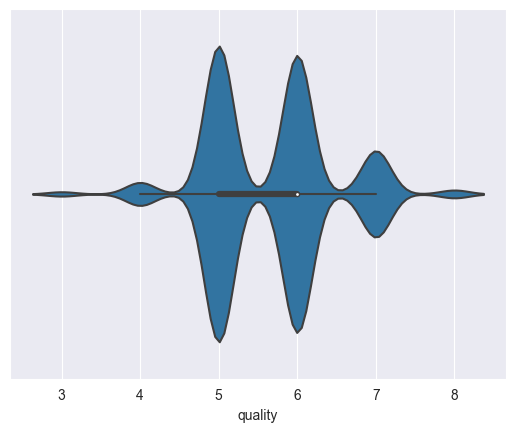

In [30]:
sns.violinplot(x = 'quality', data=data_red)
plt.show()

## Feature Engineering

In [31]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Model Selection and Training

In [32]:
# Import train_test_split for separating training and testing data

from sklearn.model_selection import train_test_split

In [33]:
# Create separate oobjects for target variable and input feature

# Target object
y = data_red.quality

# Input features
X = data_red.drop('quality', axis=1)

In [37]:
# Pass X and y to train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

In [38]:
# Print number of observations in each subset
print(len(X_train), len(X_test), len(y_train), len(y_test))

1279 320 1279 320


In [39]:
# Summary statistics from training data
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.336435,0.528776,0.273174,2.550938,0.087727,15.812353,45.897576,0.996742,3.310532,0.654433,10.428668
std,1.756593,0.181222,0.196045,1.434238,0.047207,10.516511,32.668763,0.001881,0.154932,0.170651,1.063402
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.880000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995540,3.200000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,37.000000,0.996720,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.090000,21.000000,61.000000,0.997900,3.400000,0.720000,11.100000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.900000


In [41]:
# Show numbers in pandas dataframe with 3 decimal numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [42]:
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.000,1279.000,1279.000,1279.000,1279.000,1279.000,1279.000,1279.000,1279.000,1279.000,1279.000
mean,8.336,0.529,0.273,2.551,0.088,15.812,45.898,0.997,3.311,0.654,10.429
std,1.757,0.181,0.196,1.434,0.047,10.517,32.669,0.002,0.155,0.171,1.063
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.880,0.330,8.400
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.200,0.550,9.500
50%,7.900,0.520,0.260,2.200,0.079,14.000,37.000,0.997,3.310,0.620,10.200
75%,9.200,0.640,0.430,2.600,0.090,21.000,61.000,0.998,3.400,0.720,11.100
max,15.900,1.580,0.790,15.500,0.611,72.000,289.000,1.004,4.010,1.980,14.900


In [74]:
# Import class for standardization and generating preprocess parameters
from sklearn.preprocessing import StandardScaler

In [75]:
# Import function for creating model pipeline
from sklearn.pipeline import make_pipeline

In [76]:
# Import lasso, ridge and elastic net models
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [77]:
# Create a pipelines dictionary

pipelines = {'lasso': make_pipeline(StandardScaler(), Lasso(random_state=123)),
             'ridge': make_pipeline(StandardScaler(), Ridge(random_state=123))}

In [78]:
# Add elastic net regularized algorithm to pipelines dictionary
pipelines['enet'] = make_pipeline(StandardScaler(), ElasticNet(random_state=123))

In [79]:
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [80]:
# Display key-value pair for pipelines dictionary
pipelines.items()

dict_items([('lasso', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=123))])), ('ridge', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=123))])), ('enet', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(random_state=123))])), ('rf', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=123))])), ('gb', Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=123))]))])

In [81]:
# List tunable parameters for Lasso pipeline

pipelines['rf'].get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=123))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=123),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oo

In [82]:
# Check all model pipelines are of the correct type
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [83]:
# Create a dictionary for lasso, ridge and elasticnet hyperparameters grid

lasso_hyperparameters = {
    'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

ridge_hyperparameters = {
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

enet_hyperparameters = {
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Declare a hyperparameter grid for random forest and gradient boosting regressor

rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]
}

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [84]:
pipelines.keys()

dict_keys(['lasso', 'ridge', 'enet', 'rf', 'gb'])

In [85]:
# Create a combined hyperparameter dictionary using the same keys as n pipelines dictionary
hyperparameters = {
    'lasso': lasso_hyperparameters,
    'ridge': ridge_hyperparameters,
    'enet': enet_hyperparameters,
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters
}

In [86]:
# Check that hyperparameters is setup correctly

for key in ['lasso', 'ridge', 'enet', 'rf', 'gb']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print(key, 'was found in hyperparameters and it is a grid')
        else:
            print(key, 'was found in hyperparameters and it is not a grid')
    else:
        print(key, 'was not found in hyperparameters')

lasso was found in hyperparameters and it is a grid
ridge was found in hyperparameters and it is a grid
enet was found in hyperparameters and it is a grid
rf was found in hyperparameters and it is a grid
gb was found in hyperparameters and it is a grid


In [87]:
# Tuning models on training data with cross validation
# Import GridSearchCV to perform cross validation on hyperparameter grid

from sklearn.model_selection import GridSearchCV

### Final tuned model dictionaries

In [88]:
# Create a dictionary of models that have been fitted and tuned using cross validation

fitted_models = {}

for name, pipeline in pipelines.items():
    # Choose best set of hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit the models on best set of hyperparameters
    model.fit(X_train, y_train)
    
    # Save best fitted models in a new dictionary
    fitted_models[name] = model
    
    # print 'name' has been fitted
    print(name, 'has been fitted')

lasso has been fitted
ridge has been fitted
enet has been fitted


/Users/nuprobe/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/nuprobe/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/nuprobe/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also th

rf has been fitted
gb has been fitted


In [89]:
# Check fitted models are of the correct type

for key, value in fitted_models.items():
    print(key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [91]:
# Check that models has been fitted correctly

from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


In [92]:
# Display cross-validated training performance for each model 
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.3380534723006721
ridge 0.33442874674202444
enet 0.33794274189549267
rf 0.4759409473739458
gb 0.42855464129448484


In [93]:
# Display the performance of each model in fitted_models on test_data

for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('-------')
    print('r2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
-------
r2: 0.36398371436752763
MAE: 0.47595885488079065

ridge
-------
r2: 0.3674883892991996
MAE: 0.4705485685220621

enet
-------
r2: 0.3642913586304807
MAE: 0.47536400035838405

rf
-------
r2: 0.5070378956609388
MAE: 0.38737499999999997

gb
-------
r2: 0.43112209184843875
MAE: 0.4213932875987118



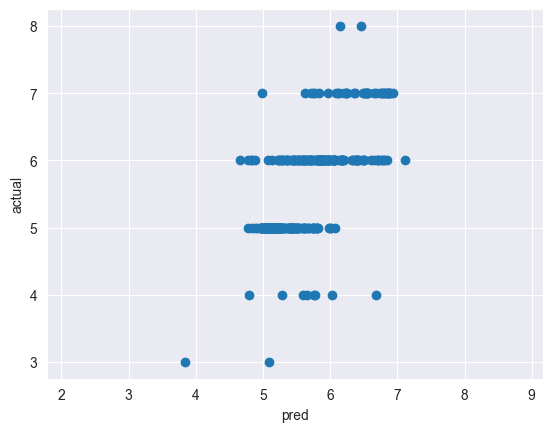

In [94]:
# Plot the performance of the winning model
plt.scatter(pred, y_test)
plt.xlabel('pred')
plt.ylabel('actual')
plt.axis('equal')
plt.show()

## Saving your model

In [95]:
# Class of winning model
print(type(fitted_models['rf']))

<class 'sklearn.model_selection._search.GridSearchCV'>


In [96]:
# Confirm you can access winning pipeline
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

In [97]:
#. Display winning pipeline directly
fitted_models['rf'].best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=200,
                                       random_state=123))])

In [98]:
# Save the winning pipeline object
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)

## Project Delivery

Use the saved model to predict brand new raw data and pacakge work together in an executable script



In [100]:
with open('final_model.pkl', 'rb') as f:
    clf = pickle.load(f)

In [101]:
print(clf)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', n_estimators=200,
                                       random_state=123))])


In [107]:
# Package all steps leading to model building/testing into a single model class

class WineQualityPredictionModel:
    
    def __init__(self, model_location):
        with open(model_location, 'rb') as f:
            self.model = pickle.load(f)
            
    def predict(self, new_obs):
        return new_obs, self.model.predict(new_obs)

## Deploy models

* In jupyter notebook, the model class defined earlier can directly be used

In [109]:
# Read new raw_data (white wine data)

raw_data = pd.read_csv('winequality-white.csv', delimiter=';')
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6
1,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6
2,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6
3,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6
4,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6


In [117]:
# quality column removed from new raw_data
raw_data_features = raw_data.drop('quality', axis = 1)
raw_data_features.head()

raw_data_features.to_csv('white_wine_data_without_quality.csv', index=None)

In [111]:
# Predict quality for this raw_features using model created for red_wine data

# First load an instance of the model

red_wine_model = WineQualityPredictionModel('final_model.pkl')

In [114]:
# Predict quality on white wine `raw_data_features`
_, pred1 = red_wine_model.predict(raw_data_features)
print(len(pred1))

4898


In [115]:
raw_data_features['predicted_quality'] = pred1
raw_data_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predicted_quality
0,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,5.170
1,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,5.375
2,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,5.650
3,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,5.590
4,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,5.590


## Deploying model using an executable script. 

See python script `WineQualityModel.py in the working directory

In [120]:
# Save white wine data with original quality data and predictions based on fitting red_wine_data
df1 = pd.read_csv('predictions.csv')
df2 = pd.read_csv('winequality-white.csv', delimiter=';')
white_wine_predictions = pd.concat([df2, df1['prediction']], axis=1)
white_wine_predictions.to_csv('white_wine_predictions.csv')